<a href="https://colab.research.google.com/github/pietrodileo/Python_for_MD_thesis/blob/main/CreateSpectrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔊 **Audio Signal Visualization** 
## Generate easily different plot from audio signals stored in Google Drive

## Import libraries 📚

In [109]:
#importing the libraries
import os 
import cv2
import numpy as np
import matplotlib
#This backend of matplotlib doesn't show plots to the user, but we can save them to Google Drive
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import pdb
import librosa
import librosa.display
from scipy.io import wavfile
import seaborn as sns
from pathlib import Path
import pylab
import sys
import soundfile as sf
import tensorflow as tf
!pip install audiomentations
import torch
import torchaudio
from torchaudio import transforms
import IPython.display as ipd
# Define augmentation functions
from audiomentations import AddGaussianNoise, PitchShift, TimeStretch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# ➗ Define local functions


## Control functions 
In this section: the functions that define the outputPath and the analysis selection

In [110]:
def outputPath(subfolder,filename,OUTPUT_DIR,destination):
  file_path = os.path.join(subfolder, filename)
  file_stem = Path(subfolder).stem
  target_dir = f'class_{file_stem}'
  destination_dir = os.path.join(os.path.join(OUTPUT_DIR, destination), target_dir)
  # generate image name
  file_stem = Path(file_path).stem
  imageName = os.path.join(destination_dir, file_stem)
  return file_path, destination_dir,imageName;

def SelectDestination(selection_var):
  if selection_var == 1:
    destination = 'Sig_Spect'
  elif selection_var == 2:
    destination = 'Spectrogram' 
  elif selection_var == 3:
    destination = 'Mel-Spectrogram' 
  elif selection_var == 4:
    destination = 'Scalogram' 
  elif selection_var == 5:
    destination = 'Chromagram'
  elif selection_var == 6:
    destination = 'MFCC'
  elif selection_var == 7:
    destination = 'RASTAMAT'
  else: 
    # If an exact match is not confirmed, this last case will be used if provided
    sys.exit("Assign a proper value to the selection variable!")
  return destination

def signalAnalysis(selection_var,data,sample_rate,save_plot,imageName,overwriteControl,CMAP):
  if selection_var == 1:
    # Plot the signal
    plotSignal(data,sample_rate,save_plot,imageName, overwriteControl,CMAP)
    result = 0;
  elif selection_var == 2:
    # Plot Spectrogram
    result = spectrogramPlot(data,sample_rate,save_plot,imageName, overwriteControl,CMAP)
  elif selection_var == 3:
    result = MelSpectrogramPlot(data,sample_rate,save_plot,imageName, overwriteControl,CMAP)
  elif selection_var == 4:
    result = Scalogram(data,sample_rate,save_plot,imageName, overwriteControl,CMAP)
  elif selection_var == 5:
    result = Chromagram(data,sample_rate,save_plot,imageName, overwriteControl,CMAP)
  elif selection_var == 6:
    result = plotMFCC(data,sample_rate,save_plot,imageName, overwriteControl,CMAP)
  elif selection_var == 7:
    result = plotRASTAMAT(data,sample_rate,save_plot,imageName, overwriteControl,CMAP)
  else: 
    # If an exact match is not confirmed, this last case will be used if provided
    sys.exit("Assign a proper value to the selection variable!")
  return result

## Plot Signal Function

In [111]:
def plotSignal(data,sample_rate,save_plot,imageName):
    print('Working on it...')
    # plt.figure(figsize=(20,20))
    
    # plot_a = plt.subplot(211)
    # #plot_a.set_title('Title')
    # plot_a.plot(data)
    # plot_a.set_xlabel('sample rate * time')
    # plot_a.set_ylabel('energy')

    # plot_b = plt.subplot(212)
    # plot_b.specgram(data, NFFT=1024, Fs=sample_rate, noverlap=900)
    # plot_b.set_xlabel('Time')
    # plot_b.set_ylabel('Frequency')
    
    # plt.show()

    # # save the plot
    # if save_plot == 1:
    #   fig1 = plt.gcf()
    #   pylab.savefig(f'{imageName}.png',bbox_inches='tight',pad_inches=0)
    #   pylab.close() 


## Plot Spectrogram and Mel-Spectrogram functions



In [112]:
def spectrogramPlot(y,sample_rate,save_plot,imageName,overwriteControl,CMAP):
  
  # D_highres: numpy array
  D_highres = librosa.stft(y, hop_length=256, n_fft=4096)
  # converting into energy levels(dB)
  S_db_hr = librosa.amplitude_to_db(np.abs(D_highres), ref=np.max)
  
  # overwrite control after calculating the spectrum because it could be necessary to the image augmentation procedure with the overwrite control
  outputName = f'{imageName}_regular.png'
  if overwriteControl == 1 and os.path.exists(outputName):
    return S_db_hr
  
  fig1 = plt.figure()
  plt.figure(figsize=(20, 20), frameon=False)

  librosa.display.specshow(S_db_hr, hop_length=256, sr=sample_rate, 
                           x_axis='time', y_axis='log',cmap=CMAP)
  #plt.colorbar()
  plt.clim(-80,0)  # identical to caxis([-4,4]) in MATLAB
  plt.ylim([0, 11000])
  plt.axis('off')

  # save the plot
  if save_plot == 1:
    fig1 = plt.gcf()
    pylab.savefig(outputName)
    pylab.close()

  return S_db_hr

def MelSpectrogramPlot(y,sample_rate,save_plot,imageName,overwriteControl,CMAP):
  
  M = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_fft=4096)
  M_db = librosa.power_to_db(M, ref=np.max)

  outputName = f'{imageName}_regular.png'
  if overwriteControl == 1 and os.path.exists(outputName):
    return M_db

  fig1 = plt.figure()

  plt.figure(figsize=(20, 20), frameon=False)
  librosa.display.specshow(M_db, sr=sample_rate, x_axis='time', 
                           y_axis='mel',cmap=CMAP)
  #plt.colorbar()
  plt.clim(-80,0)  # identical to caxis([-4,4]) in MATLAB
  plt.ylim([0, 11000])
  plt.axis('off')
  
  # save the plot
  if save_plot == 1:
    fig1 = plt.gcf()
    pylab.savefig(outputName,bbox_inches='tight',pad_inches=0)
    pylab.close()
  
  return M_db

## Plot Scalogram Function

In [113]:
def Scalogram(data,sample_rate,save_plot,imageName,overwriteControl,CMAP):
  print('Working on it...')

## Plot Chromagram

In [114]:
def Chromagram(data,sample_rate,save_plot,imageName,overwriteControl,CMAP):
  print('Working on it...')

## Plot MFCC

In [115]:
def plotMFCC(data,sample_rate,save_plot,imageName,overwriteControl,CMAP):
  
  n_mfcc = 13
  n_mels = 40
  n_fft = 4096 
  hop_length = 160
  fmin = 0
  fmax = None
  mfcc_librosa = librosa.feature.mfcc(y=data, sr=sample_rate, n_fft=n_fft,
                                      n_mfcc=n_mfcc, n_mels=n_mels,
                                      hop_length=hop_length,
                                      fmin=fmin, fmax=fmax, htk=False)
  
  outputName = f'{imageName}_regular.png'
  if overwriteControl == 1 and os.path.exists(outputName):
    return mfcc_librosa
  
  plt.figure(figsize=(20, 20), frameon=False)
  sns.heatmap(mfcc_librosa, vmin=-500, vmax=300, cbar=False)
  plt.axis('off')
  
  # save the plot
  if save_plot == 1:
    fig1 = plt.gcf()
    pylab.savefig(outputName,bbox_inches='tight',pad_inches=0)
    pylab.close()
    
  return mfcc_librosa

## Plot RASTAMAT

In [116]:
def plotRASTAMAT(data,sample_rate,save_plot,imageName,overwriteControl,CMAP):
  
  n_mfcc = 13
  n_mels = 40
  n_fft = 4096 
  hop_length = 160
  fmin = 0
  fmax = None
  mfcc_librosa = librosa.feature.mfcc(y=data, sr=sample_rate, n_fft=n_fft,
                                      n_mfcc=n_mfcc, n_mels=n_mels,
                                      hop_length=hop_length,
                                      fmin=fmin, fmax=fmax, dct_type = 2,
                                      htk=False)
  
  outputName = f'{imageName}_regular.png'
  if overwriteControl == 1 and os.path.exists(outputName):
    return mfcc_librosa

  plt.figure(figsize=(20, 20), frameon=False)
  sns.heatmap(mfcc_librosa, vmin=-500, vmax=300, cbar=False)
  plt.axis('off')

  # save the plot
  if save_plot == 1:
    fig1 = plt.gcf()
    pylab.savefig(outputName,bbox_inches='tight',pad_inches=0)
    pylab.close()

  return mfcc_librosa

# 🏗 Data Normalization 

In [117]:
# Data normalization function
from audiomentations import Normalize, Compose
# data normalization
DataNormalization = Compose([Normalize(p=1.0)])  

# 🎨 Data augmentation Functions

## Data Augmentation to the Signal

In [118]:
def DataAugmentation(data,sample_rate,selection_var,save_plot,
                     imageName,overwriteControl,CMAP,result):
  ## 1. Data Augmentation to the signal
  Signal_Augmentation(selection_var,data,sample_rate,
                          save_plot,imageName,overwriteControl,CMAP)
  
  ## 2. Data Augmentation to the spectrogram
  # Freq masking
  param = 10 
  FreqBandNum = 5
  FrequencyMasking(result,param,FreqBandNum,sample_rate,
                   save_plot,imageName,overwriteControl,CMAP)
  # Time masking
  TimeBandNum = 4
  TimeMasking(result,param,TimeBandNum,sample_rate,
                  save_plot,imageName,overwriteControl,CMAP)
  # Time + Frequency
  FreqBandNum = 3
  TimeBandNum = 2
  Freq_and_Time_Masking(result,param,TimeBandNum,FreqBandNum,sample_rate,
                        save_plot,imageName,overwriteControl,CMAP)

In [122]:
def my_GaussianNoiseAddition(data, sample_rate):
  # Play audio in Jupiter Notebook / Google Colab
  #ipd.Audio('audio/conga_groove.wav') # load a local WAV file
  #ipd.Audio(data, rate=sample_rate) # load a NumPy array
  rms = np.sqrt(np.mean(data**2))
  # Noise is 20% of RMS value of the signal
  noiseMean = 0.20*rms
  noiseLen = len(data)
  stdDevNoise = 0.20*np.std(data)
  noise = np.random.normal(noiseMean,stdDevNoise,noiseLen)
  # noiseMean is the mean of the normal distribution you are choosing from
  # stdDevNoise is the standard deviation of the normal distribution
  # noiseLen is the number of elements you get in array noise
  noisyData = data+noise
  #ipd.Audio(data2, rate=sample_rate) # load a NumPy array
  return noisyData

In [123]:
def Signal_Augmentation(selection_var,data,sample_rate,save_plot,imageName,overwriteControl,CMAP):
  
  # For noise addition I use my own function
  # add gaussian noise
  # AddNoise = Compose([AddGaussianNoise(min_amplitude = minNoise, max_amplitude = maxNoise, p=1)])
  
  # Multiaugmentation (not necessary)
  # augment = Compose([AddGaussianNoise(min_amplitude = minNoise, max_amplitude = maxNoise, p=1),
  #     PitchShift(min_semitones = -8, max_semitones = -8, p=1),
  #     TimeStretch(min_rate=0.8,max_rate=1.25,leave_length_unchanged=True,p=1.0),
  #     #HighPassFilter(min_cutoff_freq = 2000, max_cutoff_freq=4000, p=1) 
  #     ])
   
  # shift pitch (shift a random number of semitones between min_semitones and max_semitones)
  pitchShifting = Compose([PitchShift(min_semitones = -2, max_semitones = -2, p=1)])

  # pitch shifting with formant preservation (unused due bad conversion results)
  # pitch = 1.1
  # formantPreservation = 1
  # timbre = 1
  # pitchshifter = StftPitchShift(1024, 256, sample_rate)
  # y = pitchshifter.shiftpitch(data,pitch, formantPreservation, timbre)
  # ipd.Audio(y, rate=sample_rate) # load a NumPy array

  # stretch time
  timeStretch = Compose([TimeStretch(min_rate=0.8,max_rate=1.25,leave_length_unchanged=True,p=1.0)])

  # Save plot = 0 or the picture will overwrite the non-augmented one
  # also overwritecontrol = 0, because it is not necessary in this case
  outputName = f'{imageName}_GaussianNoise.png'
  if not(overwriteControl == 1 and os.path.exists(outputName)): 
    #noisy_signal = AddNoise(data,sample_rate)
    noisy_signal = my_GaussianNoiseAddition(data,sample_rate)
    signalAnalysis(selection_var,noisy_signal,sample_rate,0,imageName,0,CMAP)
    if save_plot == 1:
      fig = plt.gcf()
      pylab.savefig(outputName,bbox_inches='tight',pad_inches=0)
      pylab.close()
 
  overwriteControl = 1
  outputName = f'{imageName}_PitchShifted.png'
  if not(overwriteControl == 1 and os.path.exists(outputName)): 
    pitchy_signal = pitchShifting(data,sample_rate)
    signalAnalysis(selection_var,pitchy_signal,sample_rate,0,imageName,0,CMAP)
    if save_plot == 1:
      fig = plt.gcf()
      pylab.savefig(outputName,bbox_inches='tight',pad_inches=0)
      pylab.close()

  outputName = f'{imageName}_Stretched.png'
  if not(overwriteControl == 1 and os.path.exists(outputName)): 
    stretchy_signal = timeStretch(data,sample_rate)
    signalAnalysis(selection_var,stretchy_signal,sample_rate,0,imageName,0,CMAP)
    if save_plot == 1:
      fig = plt.gcf()
      pylab.savefig(outputName,bbox_inches='tight',pad_inches=0)
      pylab.close()
  
  # outputName = f'{imageName}_SignalAugmented.png'
  # if not(overwriteControl == 1 and os.path.exists(outputName)): 
  #   augmented_signal = augment(data,sample_rate)
  #   signalAnalysis(selection_var,augmented_signal,sample_rate,0,imageName,0,CMAP)
  #   if save_plot == 1:
  #     fig = plt.gcf()
  #     pylab.savefig(outputName,bbox_inches='tight',pad_inches=0)
  #     pylab.close()

##Data Augmentation to the Spectrogram/Plot 🤿

### Time Masking

In [124]:
def my_time_mask(input, param, TimeNum, name=None):
    """
    Apply masking to a spectrogram in the freq domain.
    Args:
      input: An audio spectogram.
      param: Parameter of masking.
      name: A name for the operation (optional).
    Returns:
      A tensor of spectrogram.
    """
    input = tf.convert_to_tensor(input)
    minElement = tf.reduce_min(input)
    # TODO: Support audio with channel > 1.
    time_max = tf.shape(input)[1]
    # calculate the indexes for all the frequencies
    indices = tf.reshape(tf.range(time_max), (1, -1))
    for x in range(TimeNum):
      # param is the max value of a uniform random distribution
      t = tf.random.uniform(shape=(), minval=0, 
                            maxval=param, dtype=tf.dtypes.int32)
      # t0 is a random selected number from a uniform distribution 
      # with range (0, time_max-t)
      t0 = tf.random.uniform(shape=(), minval=0, 
                             maxval=time_max - t, dtype=tf.dtypes.int32)
      # select all the frequencies greater or equal to t0
      cond1 = tf.math.greater_equal(indices, t0)
      # select all the frequencies smaller than t0 + t
      cond2 = tf.math.less(indices, t0 + t)
      # select all the frequencies between t0 and t0 + t
      condition = tf.math.logical_and(cond1, cond2)
      time_mask = tf.where(condition,  minElement, input)

      # I was working on an alternative with numpy, but using reduce_min with tensorflow is a better option
      # c = tf.where(condition)
      # selected_indexes = c[:,1].numpy()
      # firstIndex = selected_indexes[0]
      # lastIndex = selected_indexes[-1]+1
      # time_mask = time_mask.numpy() 
      # minElement = np.amin(time_mask) #For faster implementation set directly: minElement = -80
      # # Example: time_mask[:, 122:125] # time_mask columns from 122 to 124
      # time_mask[:, firstIndex:lastIndex] = minElement
      # input = tf.convert_to_tensor(time_mask)
    return time_mask

In [125]:
def TimeMasking(result,param,TimeNum,sample_rate,save_plot,imageName,overwriteControl,CMAP):
  
  outputName = f'{imageName}_TimeMasked.png'
  if overwriteControl == 1 and os.path.exists(outputName):
    return 
  
  # Freq masking
  # Convert ndarray representing the spectrogram to a tensor for pytorch
  result_tensor = torch.from_numpy(result)        
  time_mask = my_time_mask(result_tensor, param, TimeNum)
  plt.figure(figsize=(20, 20),frameon=False)

  # TO DO: now the plot is limited to mel-spectrogram, define data augmentation also for MFCC, spectrogram, etc..
  librosa.display.specshow(time_mask.numpy(), sr=sample_rate, x_axis='time', 
                           y_axis='mel',cmap=CMAP)   
  #plt.colorbar()
  plt.clim(-80,0)  # identical to caxis([-4,4]) in MATLAB
  plt.ylim([0, 11000])
  plt.axis('off')   
  
  if save_plot == 1:
    fig2 = plt.gcf()
    pylab.savefig(outputName,bbox_inches='tight',pad_inches=0)
    pylab.close()

### Time Masking

In [126]:
def my_freq_mask(input, param, FreqNum, name=None):
    """
    Apply masking to a spectrogram in the time domain.
    Args:
      input: An audio spectogram.
      param: Parameter of masking.
      name: A name for the operation (optional).
    Returns:
      A tensor of spectrogram.
    """
    # code is quite similar to my_freq_mask
    input = tf.convert_to_tensor(input)
    minElement = tf.reduce_min(input)
    # TODO: Support audio with channel > 1.
    freq_max = tf.shape(input)[0]
    indices = tf.reshape(tf.range(freq_max), (-1, 1))
    for x in range(FreqNum):
      f = tf.random.uniform(shape=(), minval=0, 
                          maxval=param, dtype=tf.dtypes.int32)
      f0 = tf.random.uniform(shape=(), minval=0,
                          maxval=freq_max - f, dtype=tf.dtypes.int32)
      cond1 = tf.math.greater_equal(indices, f0)
      cond2 = tf.math.less(indices, f0 + f)
      condition = tf.math.logical_and(cond1, cond2)
      masking = tf.where(condition, minElement, input)
      input = masking
    return masking

In [127]:
def FrequencyMasking(result,param,FreqNum,sample_rate,save_plot,imageName,overwriteControl,CMAP):
  
  outputName = f'{imageName}_FreqMasked.png'
  if overwriteControl == 1 and os.path.exists(outputName):
    return 
  
  # Time masking
  # Convert ndarray representing the spectrogram to a tensor for pytorch
  result_tensor = torch.from_numpy(result)        
  freq_mask = my_freq_mask(result_tensor, param, FreqNum)
  
  plt.figure(figsize=(20, 20), frameon=False)
  librosa.display.specshow(freq_mask.numpy(), sr=sample_rate, x_axis='time', 
                           y_axis='mel',cmap=CMAP)   
  #plt.colorbar()
  plt.clim(-80,0)  # identical to caxis([-4,4]) in MATLAB
  plt.ylim([0, 11000])
  plt.axis('off')   
  
  if save_plot == 1:
    fig2 = plt.gcf()
    pylab.savefig(outputName,bbox_inches='tight',pad_inches=0)
    pylab.close()

### Time + Frequency Masking 

In [128]:
def Freq_and_Time_Masking(result,param,TimeNum,FreqNum,sample_rate,save_plot,imageName,overwriteControl,CMAP):
  
  outputName = f'{imageName}_Time_and_Freq_Masked.png'
  if overwriteControl == 1 and os.path.exists(outputName):
    return 
  
  # Time masking
  # Convert ndarray representing the spectrogram to a tensor for pytorch
  result_tensor = torch.from_numpy(result)        
  time_mask = my_time_mask(result_tensor, param, TimeNum)
  
  # Freq masking
  # Convert ndarray representing the spectrogram to a tensor for pytorch
  freq_mask = my_freq_mask(time_mask, param, FreqNum)

  plt.figure(figsize=(20, 20),frameon=False)
  librosa.display.specshow(freq_mask.numpy(), sr=sample_rate, x_axis='time', 
                           y_axis='mel',cmap=CMAP)   
  #plt.colorbar()
  plt.clim(-80,0)  # identical to caxis([-4,4]) in MATLAB
  plt.ylim([0, 11000])
  plt.axis('off')   
  
  if save_plot == 1:
    fig = plt.gcf()
    pylab.savefig(outputName,bbox_inches='tight',pad_inches=0)
    pylab.close()

# 👆 Define Input and Output directory 

In [129]:
#let the plot appear and store it with the notebook
%matplotlib inline
#setting the path to the directory containing the pics
INPUT_DIR = '/content/drive/MyDrive/DatasetTesi/Vowel_E_REC'
OUTPUT_DIR = '/content/drive/MyDrive/DatasetTesi/outputSpectrogram/'
valid_formats = [".wav"]
#audio_data = []

# 🔎 Choose the plot to be generated 

Change the value of selection variable to plot:
1. Signal + Spectrogram
2. Spectrogram
3. Mel-Spectrogram
4. CWT (Scalogram)
5. Chromagram
6. MFCC
7. RASTAMAT Coefficients




In [131]:
selection_var = 3
destination = SelectDestination(selection_var)
save_plot = 1; # if 1, save plot on Google Drive
overwriteControl = 0;
CMAP = 'plasma'
#plasma, jet, Greys, Greys_r (reverse), ...

# 🏋 Choose whether to augment the data or not

In [130]:
doAugmentation = True

Creo una cartella dove salvare l'output

In [132]:
# For every recording, make a spectogram and save it as label_speaker_no.png
if not os.path.exists(os.path.join(OUTPUT_DIR, destination)):
    os.makedirs(os.path.join(OUTPUT_DIR, destination))

# ✔ Generate Plot! 

Now reading 028_leonori_e.wav
Now reading 045_puggi_emma_PD_OFF_e.wav
Now reading 038_bobisse_e.wav


KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

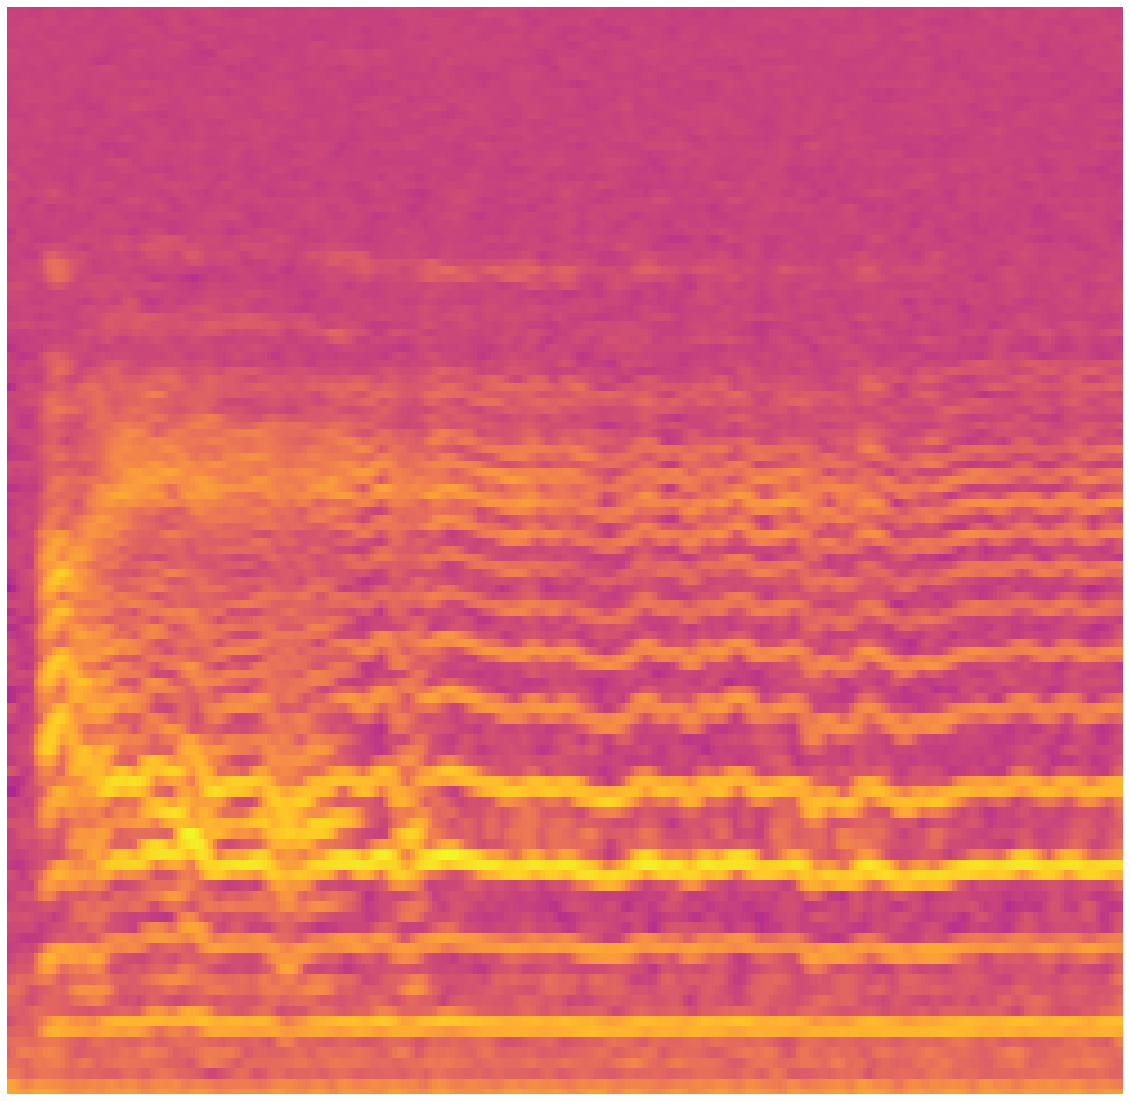

In [133]:
for folders in os.listdir(INPUT_DIR):
  # select a subfolder
  subfolder = os.path.join(INPUT_DIR,folders)
  # select all the records in the subfolder
  for filename in os.listdir(subfolder):
    file_format = os.path.splitext(filename)[1] 
    if file_format.lower() in valid_formats:
      data, sample_rate = librosa.load(os.path.join(subfolder,filename))
      # define output path
      file_path, destination_dir, imageName = outputPath(subfolder,filename,OUTPUT_DIR,destination)
      
      print('Now reading', filename)
      
      # create destination folder if it doesn't exist
      if not os.path.exists(destination_dir):
        os.mkdir(destination_dir)
      
      # Normalize data
      data = DataNormalization(data,sample_rate)      
      # Plot the signal, result is an ndarray containing the plot
      result = signalAnalysis(selection_var,data,sample_rate,
                              save_plot,imageName,overwriteControl,CMAP)
      
      if doAugmentation == True:
        DataAugmentation(data,sample_rate,selection_var,save_plot,
                     imageName,overwriteControl,CMAP,result)
